In [1]:
#! pip install mpl_toolkits.clifford
#! pip install basemap


In [2]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from mpl_toolkits.basemap import Basemap
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
get_ipython().run_line_magic('matplotlib', 'inline')
warnings.filterwarnings("ignore")


In [3]:
airports = pd.read_csv(r"C:\Users\vaibh\Desktop\DM7\Project\airports.csv")
airports


,IATA,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,GUM,Guam International,Agana,GU,USA,13.483450,-144.795983
1,PPG,Pago Pago International,Pago Pago,AS,USA,14.331023,-170.710526
2,SPN,Tinian International Airport,NaN,NaN,N Mariana Islands,14.996111,145.621384
3,STX,Henry E. Rohlsen,Christiansted,VI,USA,17.701889,-64.798556
4,PSE,Mercedita,Ponce,PR,USA,18.008303,-66.563012
...,...,...,...,...,...,...,...
312,OME,Nome,Nome,AK,USA,64.512202,-165.445246
313,FAI,Fairbanks International,Fairbanks,AK,USA,64.813677,-147.859669
314,OTZ,Ralph Wien Memorial,Kotzebue,AK,USA,66.884677,-162.598550
315,SCC,Deadhorse,Deadhorse,AK,USA,70.194756,-148.465161


In [4]:
df = pd.read_csv(r"C:\Users\vaibh\Desktop\DM7\Project\final\data.csv")
df

,Year,Quarter,Month,DayofMonth,DayOfWeek,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,Origin,OriginCityName,OriginStateName,DestAirportID,Dest,DestCityName,DestStateName,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delay,DelayStatus
0,2022,1,1,14,5,YX,20452,YX,N119HQ,4879,11066,CMH,"Columbus, OH",Ohio,11278,DCA,"Washington, DC",Virginia,12:24,12:21,-3.0,0.0,13:52,13:56,4.0,4.0,0.0,NaN,0.0,88.0,95,63.0,1.0,323.0,0.0,0.0,0.0,0.0,0.0,4.0,Ontime
1,2022,1,1,15,6,YX,20452,YX,N122HQ,4879,11066,CMH,"Columbus, OH",Ohio,11278,DCA,"Washington, DC",Virginia,12:24,12:14,-10.0,0.0,13:52,13:28,-24.0,0.0,0.0,NaN,0.0,88.0,74,50.0,1.0,323.0,0.0,0.0,0.0,0.0,0.0,-24.0,Ontime
2,2022,1,1,16,7,YX,20452,YX,N412YX,4879,11066,CMH,"Columbus, OH",Ohio,11278,DCA,"Washington, DC",Virginia,12:24,12:18,-6.0,0.0,13:52,13:39,-13.0,0.0,0.0,NaN,0.0,88.0,81,53.0,1.0,323.0,0.0,0.0,0.0,0.0,0.0,-13.0,Ontime
3,2022,1,1,17,1,YX,20452,YX,N405YX,4879,11066,CMH,"Columbus, OH",Ohio,11278,DCA,"Washington, DC",Virginia,12:24,12:17,-7.0,0.0,13:52,14:01,9.0,9.0,0.0,NaN,0.0,88.0,104,56.0,1.0,323.0,0.0,0.0,0.0,0.0,0.0,9.0,Ontime
4,2022,1,1,18,2,YX,20452,YX,N420YX,4879,11066,CMH,"Columbus, OH",Ohio,11278,DCA,"Washington, DC",Virginia,12:24,12:18,-6.0,0.0,13:52,13:23,-29.0,0.0,0.0,NaN,0.0,88.0,65,48.0,1.0,323.0,0.0,0.0,0.0,0.0,0.0,-29.0,Ontime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6233407,2022,3,9,22,4,DL,19790,DL,N387DN,501,10397,ATL,"Atlanta, GA",Georgia,11433,DTW,"Detroit, MI",Michigan,18:05,18:53,48.0,48.0,20:03,20:45,42.0,42.0,0.0,NaN,0.0,118.0,112,92.0,1.0,594.0,42.0,0.0,0.0,0.0,0.0,42.0,Delayed
6233408,2022,3,9,23,5,DL,19790,DL,N373DX,501,10397,ATL,"Atlanta, GA",Georgia,11433,DTW,"Detroit, MI",Michigan,18:05,18:06,1.0,1.0,20:03,20:00,-3.0,0.0,0.0,NaN,0.0,118.0,114,92.0,1.0,594.0,0.0,0.0,0.0,0.0,0.0,-3.0,Ontime
6233409,2022,3,9,24,6,DL,19790,DL,N675DL,501,10397,ATL,"Atlanta, GA",Georgia,11433,DTW,"Detroit, MI",Michigan,18:05,18:23,18.0,18.0,20:04,20:10,6.0,6.0,0.0,NaN,0.0,119.0,107,84.0,1.0,594.0,0.0,0.0,0.0,0.0,0.0,6.0,Ontime
6233410,2022,3,9,25,7,DL,19790,DL,N330DX,501,10397,ATL,"Atlanta, GA",Georgia,11433,DTW,"Detroit, MI",Michigan,18:05,18:16,11.0,11.0,20:03,20:04,1.0,1.0,0.0,NaN,0.0,118.0,108,86.0,1.0,594.0,0.0,0.0,0.0,0.0,0.0,1.0,Ontime


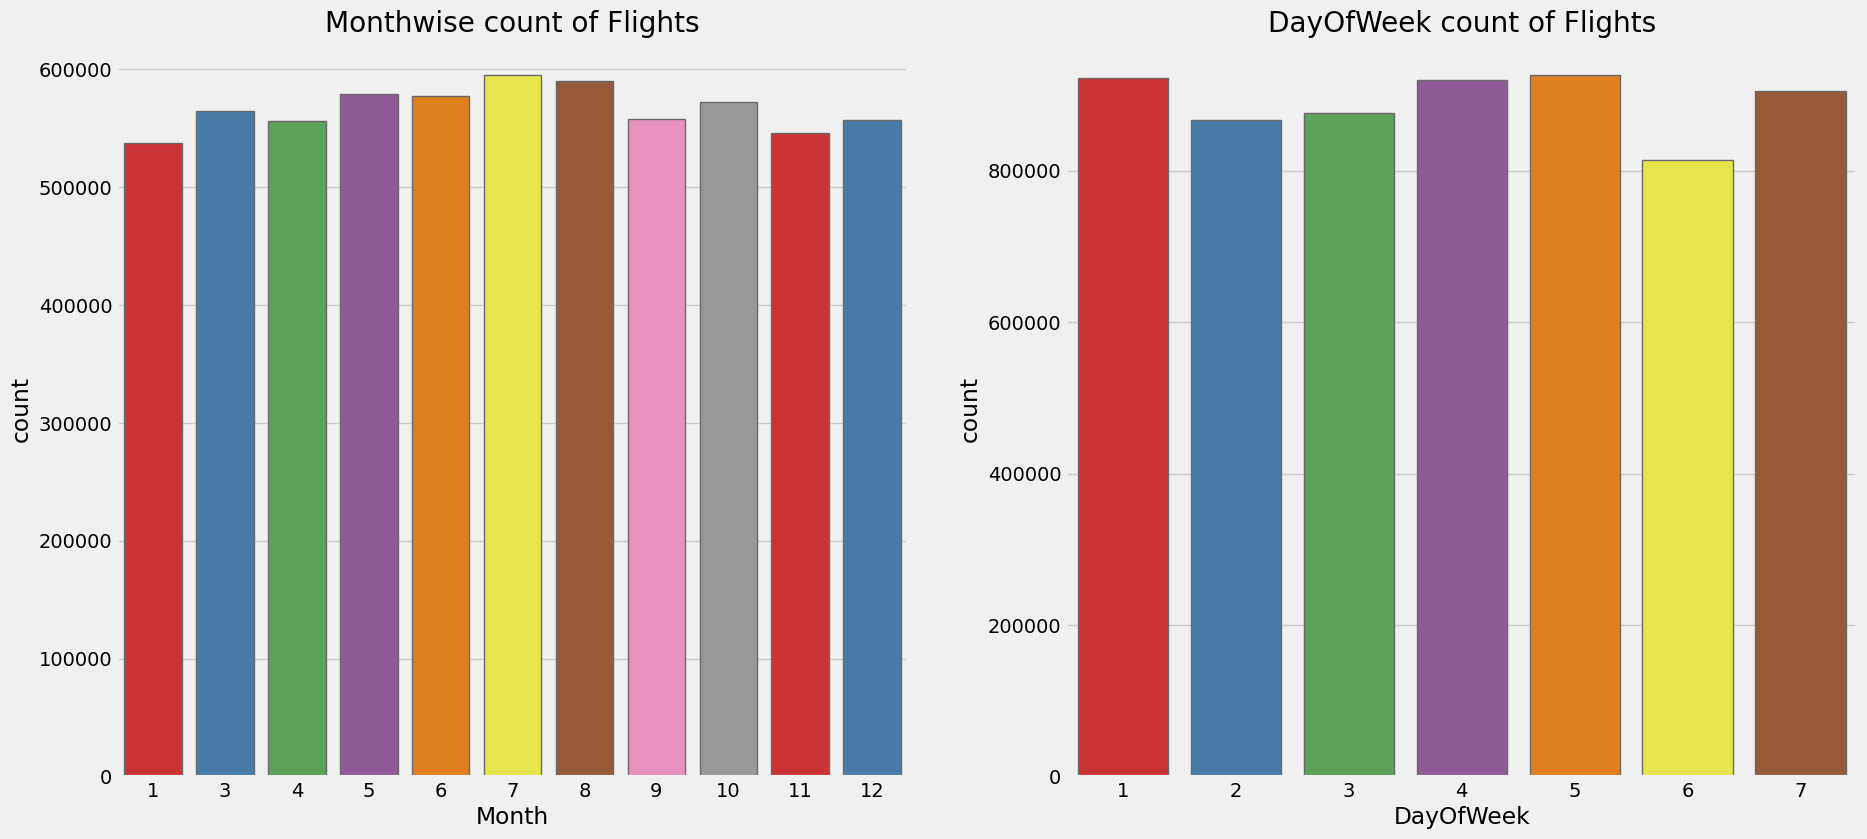

In [6]:
plt.figure(figsize = (20,20))

plt.subplot(2,2,1)
sns.countplot(x = 'Month', palette='Set1', data = df)
plt.title("Monthwise count of Flights")

plt.subplot(2,2,2)
sns.countplot(x = 'DayOfWeek', palette='Set1', data = df)
plt.title("DayOfWeek count of Flights")
plt.show()

In [8]:
count_flights = df['Origin'].value_counts()
count_flights

ATL    294923
DFW    256132
DEN    251875
ORD    241396
CLT    177010
        ...  
BKG        47
ILG        39
OGD        21
PIR         3
ATY         2
Name: Origin, Length: 372, dtype: int64

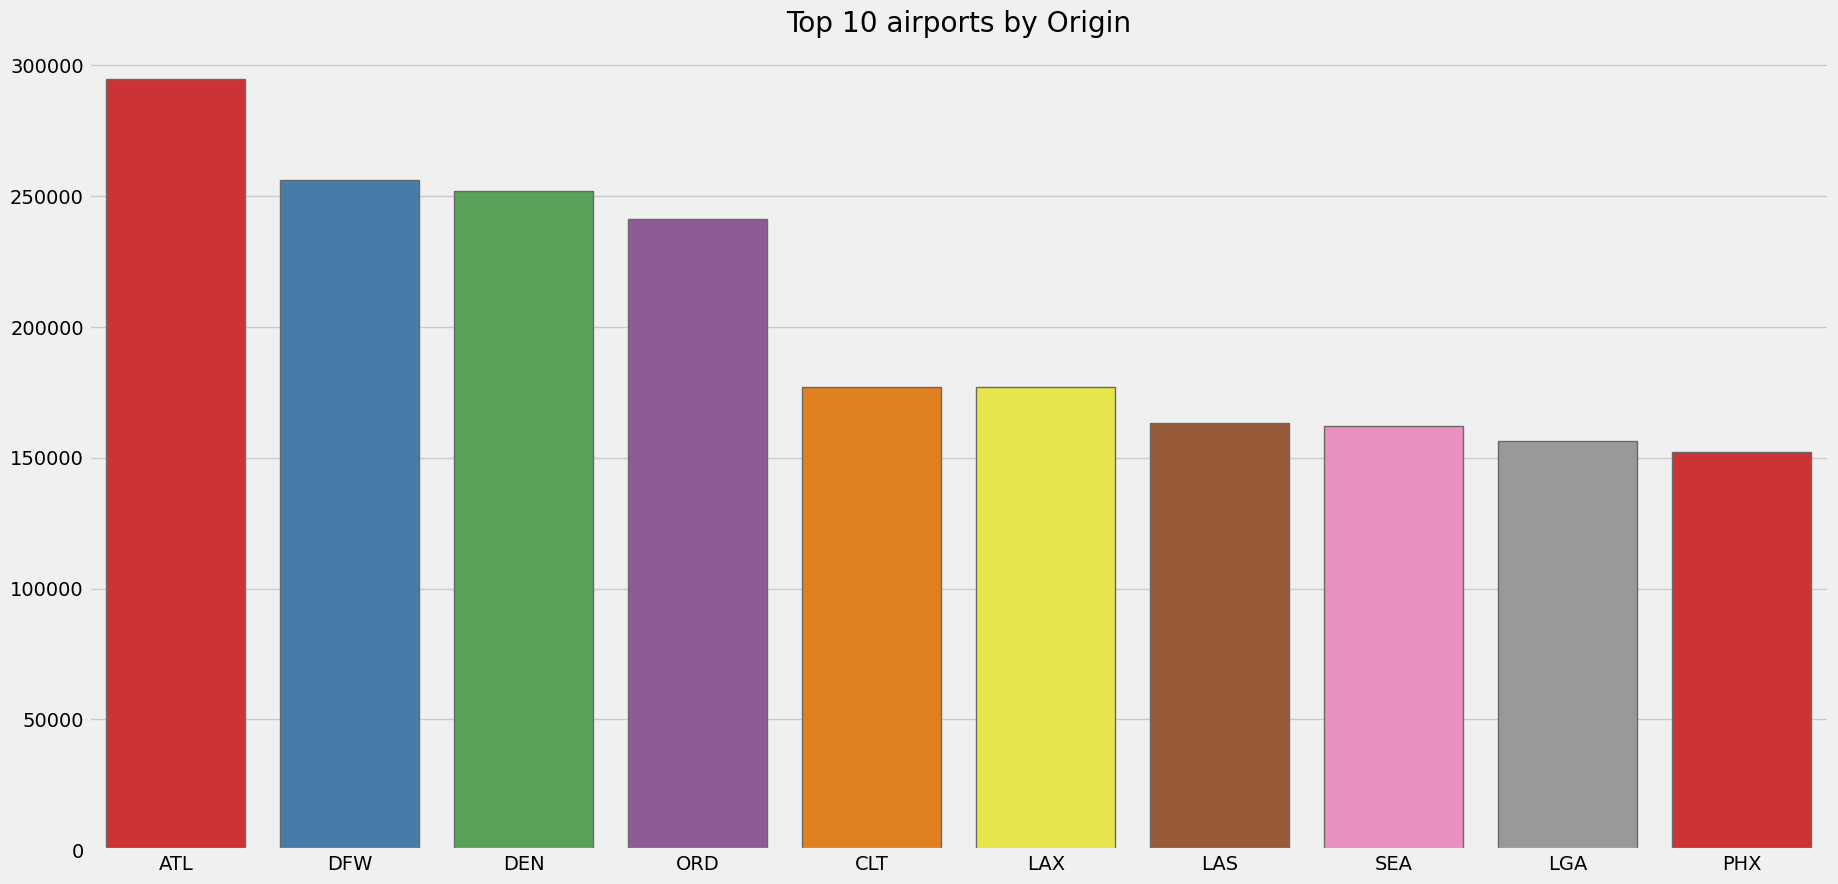

In [12]:
## Top 10 Airports by the number of flights
plt.figure(figsize = (20,10))
sns.barplot(x=count_flights.index[:10], y=count_flights.values[:10],palette='Set1')
plt.title("Top 10 airports by Origin")
plt.show(10)

In [17]:
airlines = pd.read_csv(r'C:\Users\vaibh\Desktop\DM7\Project/airlines.csv')
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,F9,Frontier Airlines Inc.
3,B6,JetBlue Airways
4,OO,Skywest Airlines Inc.
5,AS,Alaska Airlines Inc.
6,NK,Spirit Air Lines
7,WN,Southwest Airlines Co.
8,DL,Delta Air Lines Inc.
9,HA,Hawaiian Airlines Inc.


In [18]:
abbr = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()
abbr


{'UA': 'United Air Lines Inc.',
 'AA': 'American Airlines Inc.',
 'F9': 'Frontier Airlines Inc.',
 'B6': 'JetBlue Airways',
 'OO': 'Skywest Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'WN': 'Southwest Airlines Co.',
 'DL': 'Delta Air Lines Inc.',
 'HA': 'Hawaiian Airlines',
 'MQ': 'Envoy Air',
 'QX': 'Horizon Air',
 'G4': 'Allegiant Air',
 'YV': 'Mesa Airlines',
 'OH': 'PSA Airlines',
 'YX': 'Republic Airways',
 '9E': 'Endeavor Air'}

In [19]:
#__________________________________________________________________
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:
global_stats = df['DepDelay'].groupby(df['Reporting_Airline']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
Reporting_Airline,,,,
HA,-32.0,1608.0,68881.0,10.222645
QX,-38.0,979.0,81765.0,6.405809
YV,-35.0,2077.0,104898.0,15.489847
G4,-37.0,1917.0,108205.0,18.267363
F9,-43.0,1346.0,144351.0,20.875706
OH,-49.0,1607.0,195554.0,9.134520
AS,-63.0,915.0,212415.0,6.708528
9E,-90.0,1363.0,213001.0,8.941803
NK,-39.0,1587.0,215671.0,13.839098


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

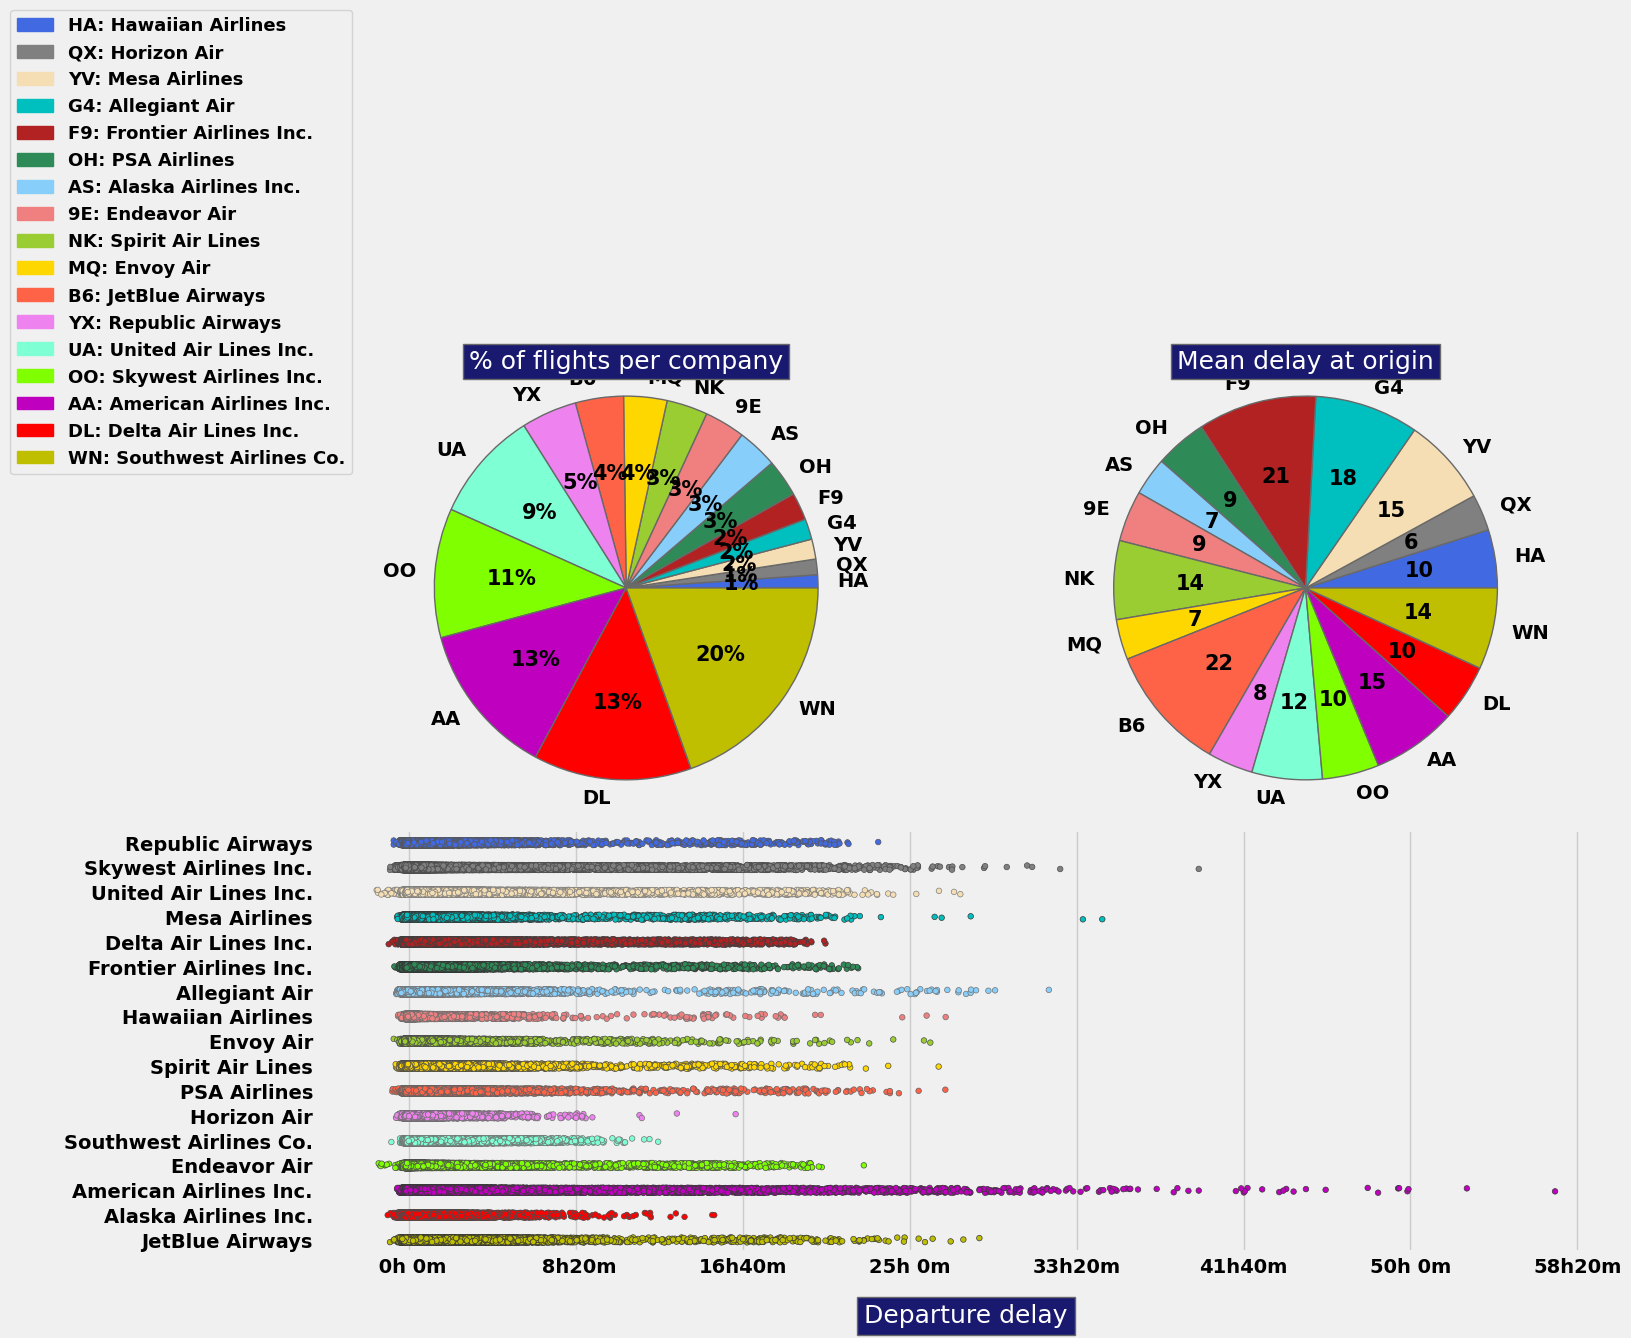

In [20]:
font = {'family' : 'normal', 'weight' : 'bold', 'size'   : 15}
mpl.rc('font', **font)
import matplotlib.patches as mpatches
#__________________________________________________________________
# I extract a subset of columns and redefine the airlines labeling 
df2 = df.loc[:, ['Reporting_Airline', 'DepDelay']]
df2['Reporting_Airline'] = df2['Reporting_Airline'].replace(abbr)
#________________________________________________________________________
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse','m','r','y']
#___________________________________
fig = plt.figure(1, figsize=(16,15))
gs=GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 
ax3=fig.add_subplot(gs[1,:]) 
#------------------------------
# Pie chart nº1: nb of flights
#------------------------------
labels = [s for s in  global_stats.index]
sizes  = global_stats['count'].values
explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len(abbr))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(len(abbr)): 
    texts[i].set_fontsize(14)
ax1.axis('equal')
ax1.set_title('% of flights per company', bbox={'facecolor':'midnightblue', 'pad':5},
              color = 'w',fontsize=18)
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(len(abbr)):
    comp_handler.append(mpatches.Patch(color=colors[i],
            label = global_stats.index[i] + ': ' + abbr[global_stats.index[i]]))
ax1.legend(handles=comp_handler, bbox_to_anchor=(0.2, 0.9), 
           fontsize = 13, bbox_transform=plt.gcf().transFigure)
#----------------------------------------
# Pie chart nº2: mean delay at departure
#----------------------------------------
sizes  = global_stats['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbr))]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels,
                                colors = colors, shadow=False, startangle=0,
                                autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
for i in range(len(abbr)): 
    texts[i].set_fontsize(14)
ax2.axis('equal')
ax2.set_title('Mean delay at origin', bbox={'facecolor':'midnightblue', 'pad':5},
              color='w', fontsize=18)
#------------------------------------------------------
# striplot with all the values reported for the delays
#___________________________________________________________________
# I redefine the colors for correspondance with the pie charts
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse','m','r','y']
#___________________________________________________________________
ax3 = sns.stripplot(y="Reporting_Airline", x="DepDelay", size = 4, palette = colors,
                    data=df2, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)
#________________________
plt.tight_layout(w_pad=3) 


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

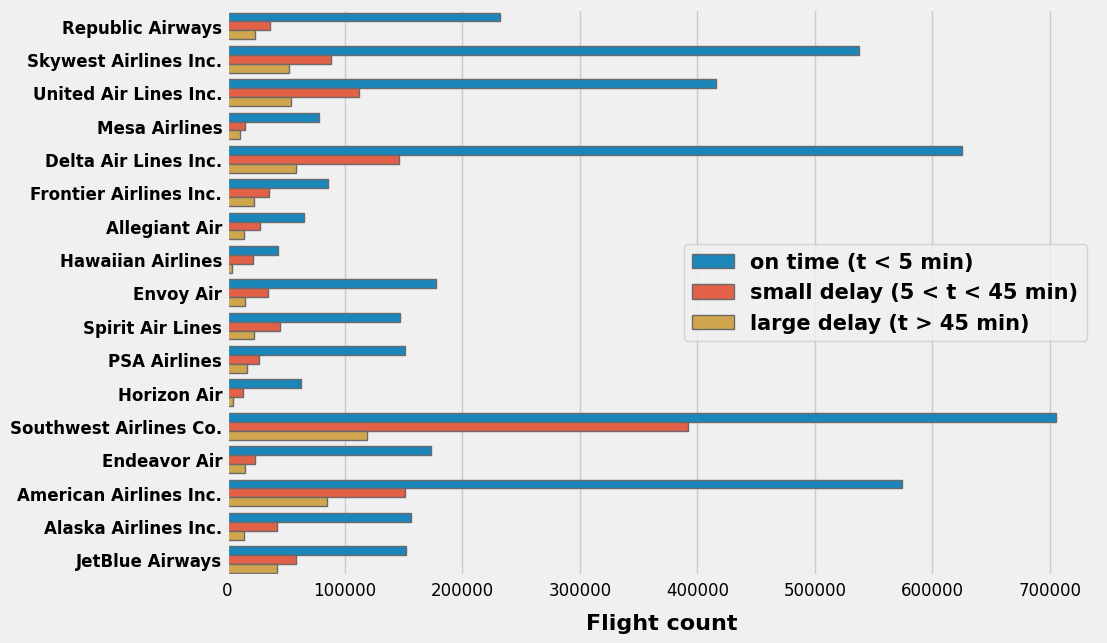

In [21]:
#_____________________________________________
# Function that define how delays are grouped
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
df['DelayLevel'] = df['DepDelay'].apply(delay_type)
#____________________________________________________
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="Reporting_Airline", hue='DelayLevel', data=df)
#____________________________________________________________________________________
# We replace the abbreviations by the full names of the companies and set the labels
labels = [abbr[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)
#________________
# Set the legend
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

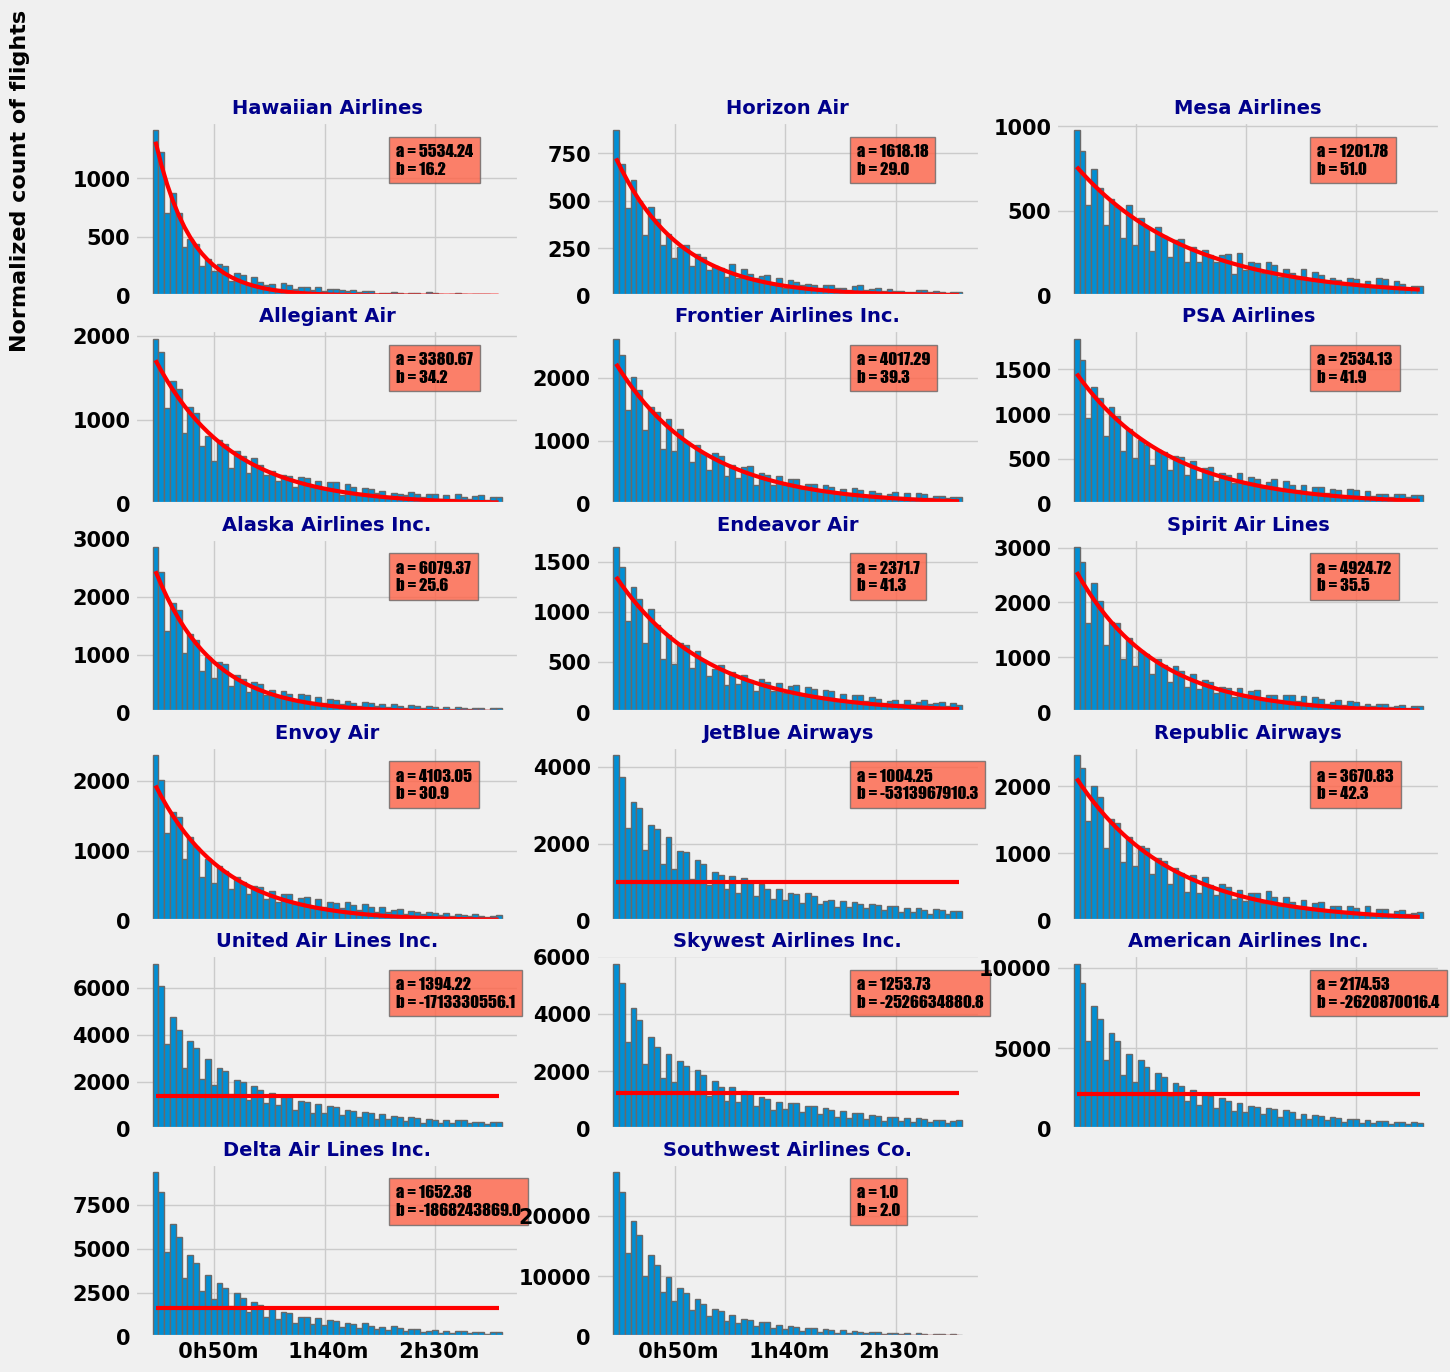

In [22]:
#___________________________________________
# Model function used to fit the histograms
def func(x, a, b):
    return a * np.exp(-x/b)
#-------------------------------------------
points = [] ; label_company = []
fig = plt.figure(1, figsize=(15,15))
i = 0
for carrier_name in [abbr[x] for x in global_stats.index]:
    i += 1
    ax = fig.add_subplot(6,3,i)    
    #_________________________
    # Fit of the distribution
    n, bins, patches = plt.hist(x = df2[df2['Reporting_Airline']==carrier_name]['DepDelay'],
                                range = (22,180),  bins= 60)
    bin_centers = bins[:-1] + 0.5 * (bins[1:] - bins[:-1])    
    popt, pcov = curve_fit(func, bin_centers, n, p0 = [1, 2])
    #___________________________
    # bookeeping of the results
    points.append(popt)
    label_company.append(carrier_name)
    #______________________
    # draw the fit curve
    plt.plot(bin_centers, func(bin_centers, *popt), 'r-', linewidth=3)    
    #_____________________________________
    # define tick labels for each subplot
    if i < 16:
        ax.set_xticklabels(['' for x in ax.get_xticks()])
    else:
        ax.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                            for x in ax.get_xticks()])
    #______________
    # subplot title
    plt.title(carrier_name, fontsize = 14, fontweight = 'bold', color = 'darkblue')
    #____________
    # axes labels 
    if i == 4:
        ax.text(-0.3,0.9,'Normalized count of flights', fontsize=16, rotation=90,
            color='k', horizontalalignment='center', transform = ax.transAxes)
    if i == 14:
        ax.text( 0.5, -0.5 ,'Delay at origin', fontsize=16, rotation=0,
            color='k', horizontalalignment='center', transform = ax.transAxes)
    #___________________________________________
    # Legend: values of the a and b coefficients
    ax.text(0.68, 0.7, 'a = {}\nb = {}'.format(round(popt[0],2), round(popt[1],1)),
            style='italic', transform=ax.transAxes, fontsize = 12, family='fantasy',
            bbox={'facecolor':'tomato', 'alpha':0.8, 'pad':5})
    
plt.tight_layout()

<AxesSubplot: title={'center': 'Flight Delay (Minutes)'}, ylabel='Frequency'>

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

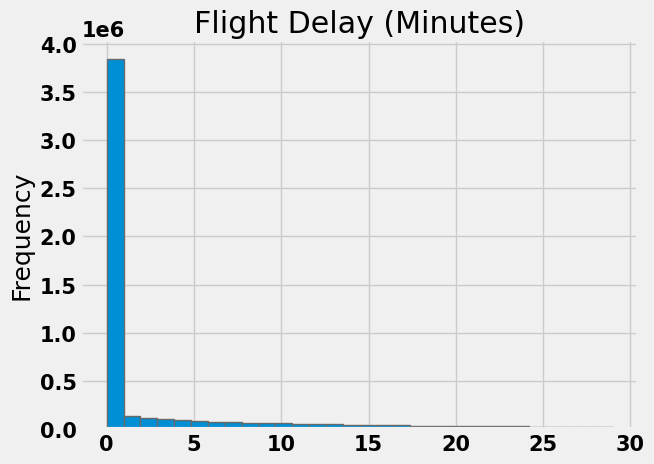

In [23]:
df.query('DepDelayMinutes < 30')['DepDelayMinutes'].plot(kind='hist', bins=30,
                                                        title='Flight Delay (Minutes)')


In [24]:
print(df['Cancelled'].value_counts())
print('Percent Cancelled :', round(sum(df['Cancelled'] == True) / len(df['Cancelled']) * 100, 2), '% of all flights')

0.0    6073862
1.0     159550
Name: Cancelled, dtype: int64
Percent Cancelled : 2.56 % of all flights


<AxesSubplot: title={'center': 'Flight Delay (Minutes)'}, ylabel='Frequency'>

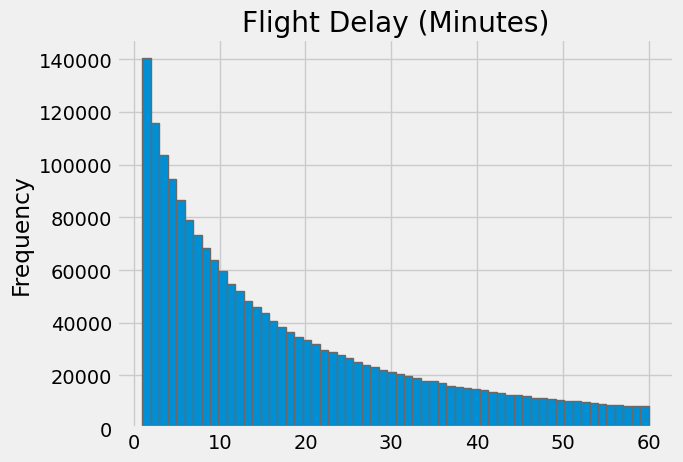

In [14]:
df.query('(DepDelayMinutes > 0) and (DepDelayMinutes < 61)')['DepDelayMinutes'].plot(kind='hist', bins=60,
                                                                                     title='Flight Delay (Minutes)')
# Zero '0' minute delays are excluded.

In [16]:
label_company

['Hawaiian Airlines',
 'Horizon Air',
 'Mesa Airlines',
 'Allegiant Air',
 'Frontier Airlines Inc.',
 'PSA Airlines',
 'Alaska Airlines Inc.',
 'Endeavor Air',
 'Spirit Air Lines',
 'Envoy Air',
 'JetBlue Airways',
 'Republic Airways',
 'United Air Lines Inc.',
 'Skywest Airlines Inc.',
 'American Airlines Inc.',
 'Delta Air Lines Inc.',
 'Southwest Airlines Co.']

In [17]:
len(abbr)

17

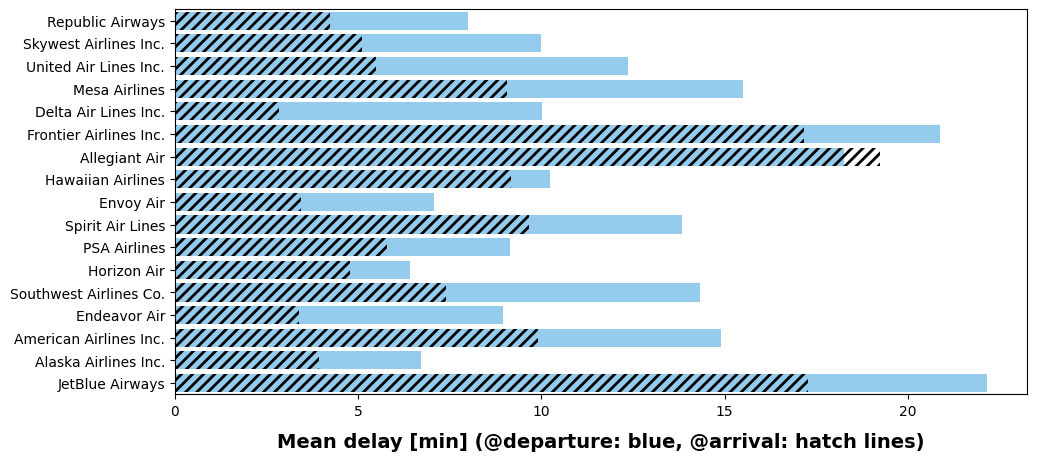

In [20]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0  

fig = plt.figure(1, figsize=(11,5))
ax = sns.barplot(x="DepDelay", y="Reporting_Airline", data=df, color="lightskyblue", ci=None)
ax = sns.barplot(x="ArrDelay", y="Reporting_Airline", data=df, color="r", hatch = '///',
                 alpha = 0.0, ci=None)
labels = [abbr[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
ax.yaxis.label.set_visible(False)
plt.xlabel('Mean delay [min] (@departure: blue, @arrival: hatch lines)',
           fontsize=14, weight = 'bold', labelpad=10);
plt.show()

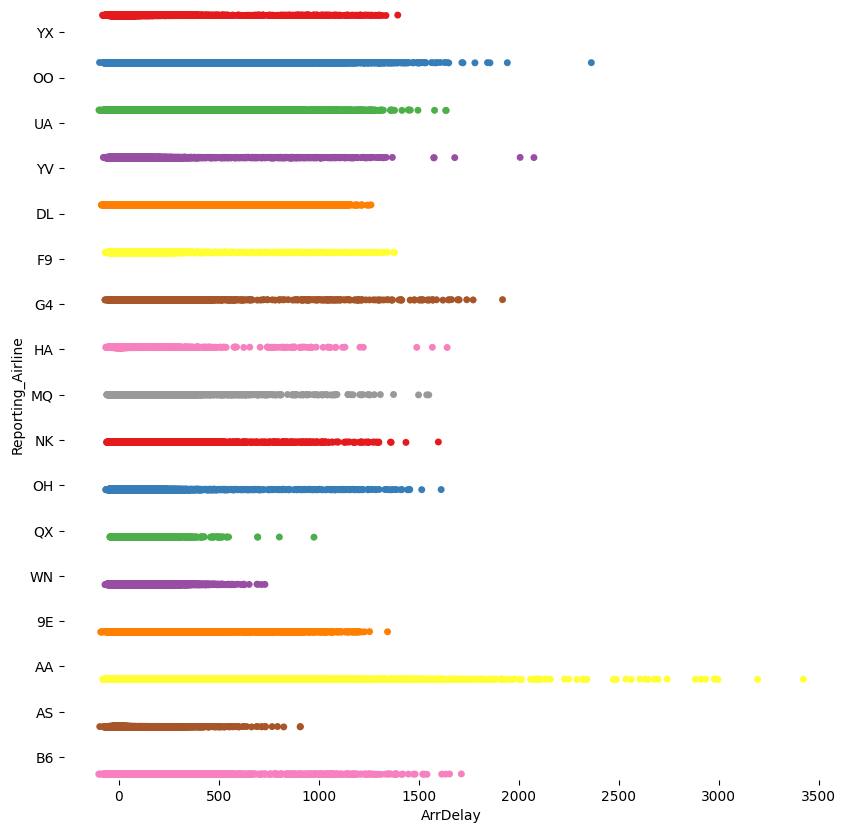

In [24]:
axis = plt.subplots(figsize=(10,10))
sns.despine(bottom=True, left=True)
sns.stripplot(x="ArrDelay", y="Reporting_Airline",data = df, dodge=True, jitter=True,palette="Set1")
plt.show()